# 1.Import libraries and load dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import files
 
 
uploaded = files.upload()

Saving ANZ synthesised transaction dataset.xlsx to ANZ synthesised transaction dataset.xlsx


**Data Loading**

In [5]:
df = pd.read_excel("ANZ synthesised transaction dataset.xlsx")
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


# 2.Data Wrangling and Basic Checks

In [6]:
# check the shape of the DataFrame
df.shape

(12043, 23)

From the above observation we confirm that the dataset contains and 12043 transactions and 23 features. Now after careful analysis we also observe that some of these features are not required for our analysis. So, we are dropping irrelevant features and keeping only those features that adds value to our analysis.

In [7]:
# confirmation of existing columns of file on load
pd.DataFrame({"Columns": df.columns})

,Columns
0,status
1,card_present_flag
2,bpay_biller_code
3,account
4,currency
5,long_lat
6,txn_description
7,merchant_id
8,merchant_code
9,first_name


# 2.1 Unique customers, unique transactions and 3 months of data checks

Before we explore explore each column individually, let's check for the following:

100 unique customers (customer_id)
Each row corresponds to a unique transaction ID (transaction_id)
3 months worth of data (date)


In [8]:
print("Number of unique customer ID's: ", df.customer_id.nunique())

Number of unique customer ID's:  100


In [9]:
print("Number of rows in dataset: ", len(df))
print("Number of unique transaction ID's: ", df.transaction_id.nunique())

Number of rows in dataset:  12043
Number of unique transaction ID's:  12043


In [10]:
df.date.describe()

count                   12043
unique                     91
top       2018-09-28 00:00:00
freq                      174
first     2018-08-01 00:00:00
last      2018-10-31 00:00:00
Name: date, dtype: object


We do indeed have 3 months worth of data, starting from 1/8/2018 to 31/10/2018. However, there are only 91 unique days which means that there is one missing day.

In [11]:
pd.date_range(start = "2018-08-01", end = "2018-10-31").difference(df.date)

DatetimeIndex(['2018-08-16'], dtype='datetime64[ns]', freq=None)

We have one missing date on 16/8/2018.

# 2.2 Non-null count and data types

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

The info function provides information about the data types and presence of missing values in each column of the dataset.

# 2.3 Missing values

In [13]:

missing = df.isnull().sum()
missing = missing[missing > 0]
missing_percentage = round(missing / len(df), 3) * 100
pd.DataFrame({"Number of missing values": missing, "Percentage": missing_percentage}).sort_values(by = "Percentage", ascending = False)

,Number of missing values,Percentage
bpay_biller_code,11158,92.7
merchant_code,11160,92.7
card_present_flag,4326,35.9
merchant_id,4326,35.9
merchant_suburb,4326,35.9
merchant_state,4326,35.9
merchant_long_lat,4326,35.9


In [14]:
#Checking the percentage of missing values
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

status                0.000000
card_present_flag    35.921282
bpay_biller_code     92.651333
account               0.000000
currency              0.000000
long_lat              0.000000
txn_description       0.000000
merchant_id          35.921282
merchant_code        92.667940
first_name            0.000000
balance               0.000000
date                  0.000000
gender                0.000000
age                   0.000000
merchant_suburb      35.921282
merchant_state       35.921282
extraction            0.000000
amount                0.000000
transaction_id        0.000000
country               0.000000
customer_id           0.000000
merchant_long_lat    35.921282
movement              0.000000
dtype: float64


  Both bpay_biller_code and merchant_code columns contain a significant number of missing values. We will deal with those missing values later.

Let's examine the summary statistics of the numerical columns in the dataset.

In [15]:
#checking for duplicated values
df.duplicated().sum() 

0

In [16]:
#checking for unique values
df.nunique()

status                   2
card_present_flag        2
bpay_biller_code         3
account                100
currency                 1
long_lat               100
txn_description          6
merchant_id           5725
merchant_code            1
first_name              80
balance              12006
date                    91
gender                   2
age                     33
merchant_suburb       1609
merchant_state           8
extraction            9442
amount                4457
transaction_id       12043
country                  1
customer_id            100
merchant_long_lat     2703
movement                 2
dtype: int64

In [17]:
#dropping the columns
df=df.drop(['bpay_biller_code', 'merchant_code'], axis = 1)

Dropping these two columns as they have approximately 92% of the data missing.

# 2.3 Missing Value Treatment

In [18]:

#using mode imputation
df['card_present_flag']=df['card_present_flag'].fillna(df['card_present_flag'].mode()[0])
df['merchant_id']=df['merchant_id'].fillna(df['merchant_id'].mode()[0])
df['merchant_suburb']=df['merchant_suburb'].fillna(df['merchant_suburb'].mode()[0])
df['merchant_state']=df['merchant_state'].fillna(df['merchant_state'].mode()[0])
df['merchant_long_lat']=df['merchant_long_lat'].fillna(df['merchant_long_lat'].mode()[0])

In [19]:
df.isnull().sum()

status               0
card_present_flag    0
account              0
currency             0
long_lat             0
txn_description      0
merchant_id          0
first_name           0
balance              0
date                 0
gender               0
age                  0
merchant_suburb      0
merchant_state       0
extraction           0
amount               0
transaction_id       0
country              0
customer_id          0
merchant_long_lat    0
movement             0
dtype: int64

Now there are no missing values

In [20]:
df.describe()

,card_present_flag,balance,age,amount
count,12043.000000,12043.000000,12043.000000,12043.000000
mean,0.873536,14704.195553,30.582330,187.933588
std,0.332385,31503.722652,10.046343,592.599934
min,0.000000,0.240000,18.000000,0.100000
25%,1.000000,3158.585000,22.000000,16.000000
50%,1.000000,6432.010000,28.000000,29.000000
75%,1.000000,12465.945000,38.000000,53.655000
max,1.000000,267128.520000,78.000000,8835.980000


The describe function is a good way to observe any anomalies in the numerical 
columns for example, we can check if the age and amount columns contain any negative values, or if a customer has an age of 150 etc. Here, I do not see any anomalies.




## **3.Exploratory Data Analysis**

## 3.1.Categorical variables

3.1.1 Status

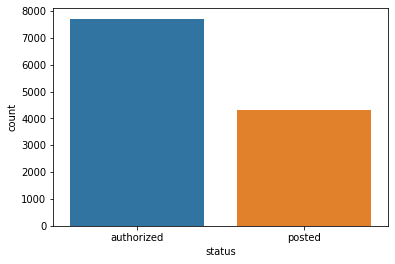

In [21]:
sns.countplot(data=df,x='status')

In [22]:
df['status'].value_counts(normalize=True)*100

authorized    64.078718
posted        35.921282
Name: status, dtype: float64

Status of of the individual transactions: authorised means transaction has already been approved, posted means still in the process.64% of the transactions were authorized and roughly 36% were posted.

3.1.2 Card present flag

In [23]:
df.card_present_flag.value_counts(dropna = False)

1.0    10520
0.0     1523
Name: card_present_flag, dtype: int64

Card-not-present (CNP)what-is-a-card-not-present-transaction transaction occurs when neither the cardholder nor the credit card is physically present at the time of the transaction. It's most common for orders that happen remotely over the phone, internet or mail.

3.1.3 Currency of transaction

In [24]:
df.currency.value_counts(dropna = False)

AUD    12043
Name: currency, dtype: int64

All transactions are made in AUD. Can potentially drop this column because unnecessary since it does not provide us with any additional information.



3.1.4 Longitude and latitude

In [25]:
df.long_lat.head()

0    153.41 -27.95
1    153.41 -27.95
2    151.23 -33.94
3    153.10 -27.66
4    153.41 -27.95
Name: long_lat, dtype: object

3.1.5 Transaction description (types of transactions)

In [26]:
df.txn_description.value_counts(dropna = False)

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

Text(0.5, 1.0, 'Number of transactions by category')

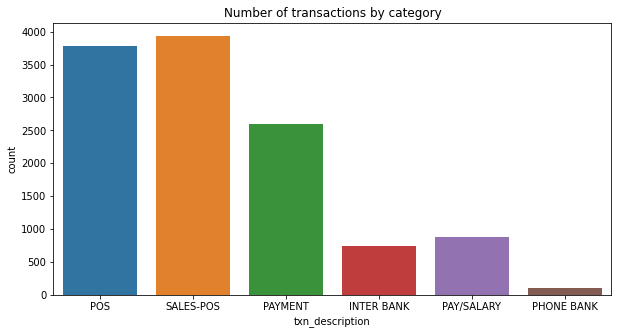

In [27]:
plt.figure(figsize = (10, 5))
sns.countplot(df.txn_description)
plt.title("Number of transactions by category")

These are the descriptions for each transaction. Transactions mostly consist of sales payment.

Also, this might explain the missing values in the merchant columns as not all transactions are purchases of goods and services from merchants. We can validate this later.

In [28]:
df[["txn_description", "amount"]].groupby("txn_description", as_index = False).mean().sort_values(by = "amount", ascending = False)


,txn_description,amount
1,PAY/SALARY,1898.728029
3,PHONE BANK,106.099010
0,INTER BANK,86.699461
2,PAYMENT,77.613077
4,POS,40.407412
5,SALES-POS,39.909789


plt.figure(figsize = (8, 5))
sns.barplot(x = "txn_description", y = "amount", data = data)
plt.title("Average transaction volume by category")

Text(0.5, 1.0, 'Average transaction volume by category')

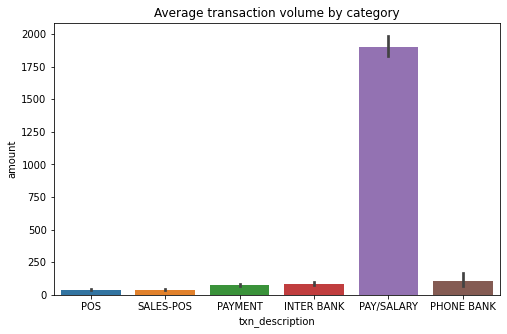

In [29]:
plt.figure(figsize = (8, 5))
sns.barplot(x = "txn_description", y = "amount", data = df)
plt.title("Average transaction volume by category")

Pay/salary has the largest average transaction volume. Seems logical.

3.1.6 Gender

In [30]:
df.gender.value_counts(dropna = False)

M    6285
F    5758
Name: gender, dtype: int64

Text(0.5, 1.0, 'Number of transactions by gender')

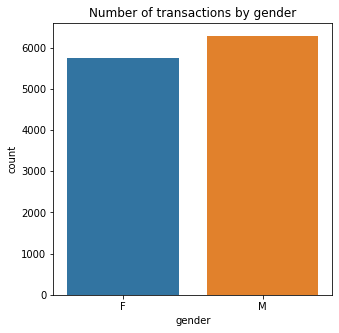

In [31]:
plt.figure(figsize = (5, 5))
sns.countplot(df.gender)
plt.title("Number of transactions by gender")

There are more male customer transactions than there are female.

In [32]:
df[["gender", "amount"]].groupby("gender", as_index = False).mean().sort_values(by = "amount", ascending = False)

,gender,amount
1,M,205.721809
0,F,168.517303


Total number of transactions made on each day

Text(0.5, 1.0, 'Average transaction volume by gender')

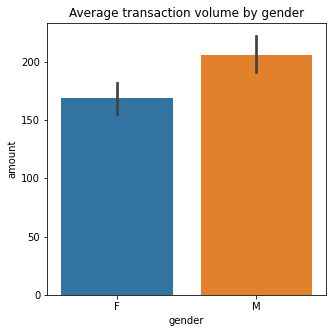

In [33]:
plt.figure(figsize = (5, 5))
sns.barplot(x = "gender", y = "amount", data = df)
plt.title("Average transaction volume by gender")

Male has a higher average transaction volume.

3.1.7 Merchant suburb

In [34]:
df.merchant_suburb.value_counts(dropna = False)

Melbourne            4581
Sydney                233
Southport              82
Brisbane City          79
Chatswood              55
                     ... 
Cowell                  1
Tweed Heads South       1
Ballandean              1
Sydenham                1
Kings Park              1
Name: merchant_suburb, Length: 1609, dtype: int64

These are the suburbs where the transactions were made.

3.1.8 Merchant state

In [35]:
df.merchant_state.value_counts(dropna = False)

NSW    6495
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

Text(0.5, 1.0, 'Number of transactions by state')

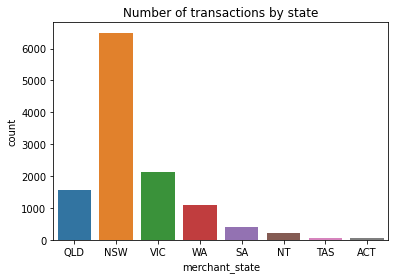

In [36]:
sns.countplot(data=df,x='merchant_state')
plt.title("Number of transactions by state")

Similar to merchant suburb, these are the states where the transactions were made.

NSW and VIC are the top 2 states in number of transactions.

In [37]:
df[["merchant_state", "amount"]].groupby("merchant_state", as_index = False).mean().sort_values(by = "amount", ascending = False)

,merchant_state,amount
1,NSW,316.464915
0,ACT,66.803836
2,NT,44.726293
6,VIC,41.099953
4,SA,40.425470
3,QLD,34.372397
7,WA,30.901873
5,TAS,28.866618


Text(0.5, 1.0, 'Average transaction volume by state')

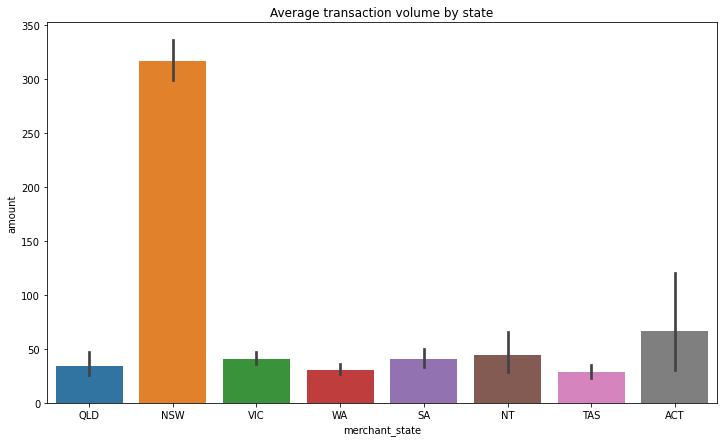

In [38]:
plt.figure(figsize = (12, 7))
sns.barplot(x = "merchant_state", y = "amount", data = df)
plt.title("Average transaction volume by state")

NSW has the highest average transaction volume but the variance is quite large.

3.1.9 Extraction

In [39]:
df.extraction.head()

0    2018-08-01T01:01:15.000+0000
1    2018-08-01T01:13:45.000+0000
2    2018-08-01T01:26:15.000+0000
3    2018-08-01T01:38:45.000+0000
4    2018-08-01T01:51:15.000+0000
Name: extraction, dtype: object

This appears to be the timestamp for each transaction. We can cross-reference this with the date column.

In [40]:
df[["date", "extraction"]].head()

,date,extraction
0,2018-08-01,2018-08-01T01:01:15.000+0000
1,2018-08-01,2018-08-01T01:13:45.000+0000
2,2018-08-01,2018-08-01T01:26:15.000+0000
3,2018-08-01,2018-08-01T01:38:45.000+0000
4,2018-08-01,2018-08-01T01:51:15.000+0000



Since we already have an existing date column, we can potentially extract only the time component out of the extraction column.

3.1.10 Country

In [41]:
df.country.value_counts(dropna = False)

Australia    12043
Name: country, dtype: int64

All transactions were recorded within Australia. Therefore, can consider dropping this column since it does not provide us with any information.



3.1.11 Merchant longitude and latitude

In [42]:
df.merchant_long_lat.head()

0    153.38 -27.99
1    151.21 -33.87
2    151.21 -33.87
3    153.05 -26.68
4    153.44 -28.06
Name: merchant_long_lat, dtype: object

These are the coordinates of the merchants' location.

3.1.12 Movement (debit/credit)

In [43]:
df.movement.value_counts(dropna = False)

debit     11160
credit      883
Name: movement, dtype: int64

In [44]:
df['movement'].value_counts(normalize=True)*100

debit     92.66794
credit     7.33206
Name: movement, dtype: float64

92% of the transactions were made using debit card.

Text(0.5, 1.0, 'Number of transactions by movement')

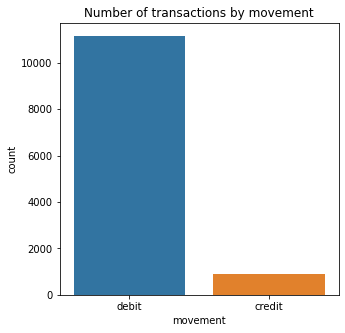

In [45]:
plt.figure(figsize = (5 ,5))
sns.countplot(df.movement)
plt.title("Number of transactions by movement")


Most transactions are overwhelmingly debit transactions.

Text(0.5, 1.0, 'Average transaction volume by movement')

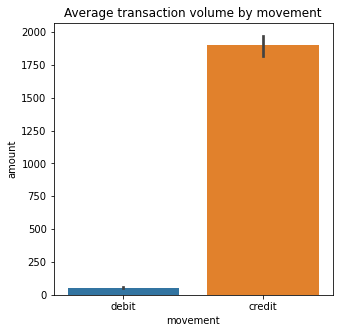

In [46]:
plt.figure(figsize = (5, 5))
sns.barplot(x = "movement", y = "amount", data = df)
plt.title("Average transaction volume by movement")

However, the average transaction amount for credit transactions are much higher.

# **3.2 Numerical variables**

3.2.1 Balance

Text(0.5, 1.0, 'Balance distribution')

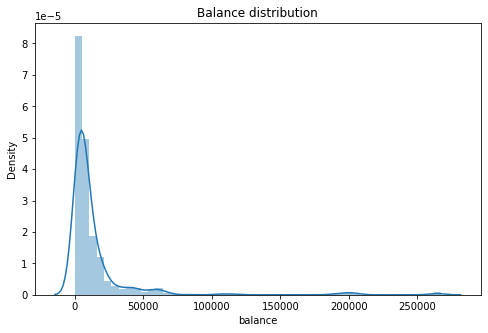

In [47]:
plt.figure(figsize = (8, 5))
sns.distplot(df.balance)
plt.title("Balance distribution")

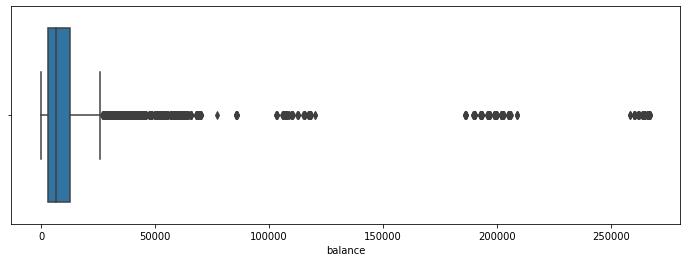

In [48]:
plt.figure(figsize = (12, 4))
sns.boxplot(df.balance)

Distribution of the balance feature has a long tail.

# 3.2.2 Age of customers

Text(0.5, 1.0, 'Age distribution')

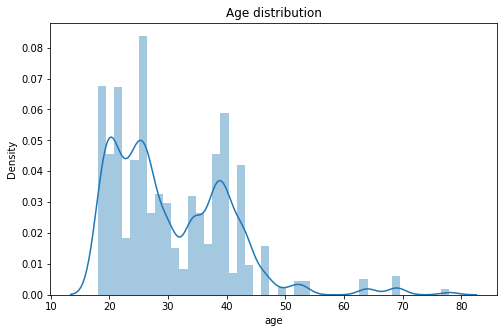

In [49]:
plt.figure(figsize = (8, 5))
sns.distplot(df.age)
plt.title("Age distribution")

Majority of the customers belong in the 20-25 age bracket.

# 3.2.3 Transaction amount

Text(0.5, 1.0, 'Amount distribution')

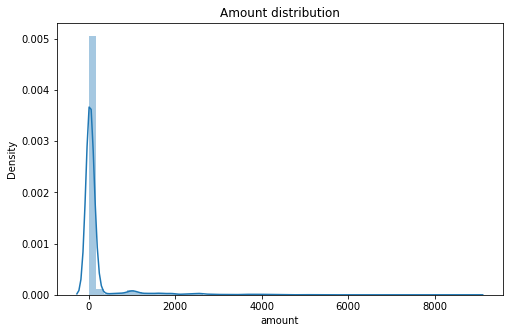

In [50]:
plt.figure(figsize = (8, 5))
sns.distplot(df.amount)
plt.title("Amount distribution")

In [53]:
# storing month of dates in month column
df['month'] = df['date'].dt.month

# storing day of date in day column
df['day of week'] = df['date'].dt.dayofweek

# whether day is weekend
df['weekend'] = np.where(df['day of week'].isin([6, 5]), 1, 0)
                         
df.head()

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,...,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,month,day of week,weekend
0,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,...,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,8,2,0
1,authorized,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,...,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,8,2,0
2,authorized,1.0,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,...,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,8,2,0
3,authorized,1.0,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,...,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,8,2,0
4,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,...,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,8,2,0


In [54]:
# converting day of week in week names
def days(x):
    if x == 0:
        return 'Monday'
    if x == 1:
        return 'Tuesday'
    if x == 2:
        return 'Wednesday'
    if x == 3:
        return 'Thursday'
    if x == 4:
        return 'Friday'
    if x == 5:
        return 'Saturday'
    if x == 6:
        return 'Sunday'
df['day of week'] = df['day of week'].apply(days)

df.head()

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,...,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,month,day of week,weekend
0,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,...,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,8,Wednesday,0
1,authorized,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,...,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,8,Wednesday,0
2,authorized,1.0,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,...,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,8,Wednesday,0
3,authorized,1.0,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,...,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,8,Wednesday,0
4,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,...,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,8,Wednesday,0


Average number of transactions made by customers each month

10    40.87
9     40.13
8     39.43
Name: month, dtype: float64


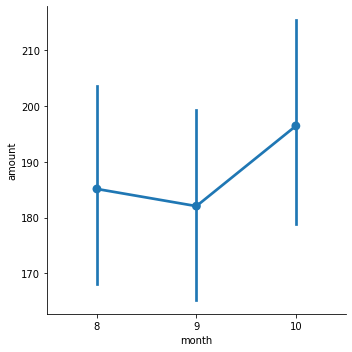

In [59]:
print(df['month'].value_counts() / 100)
sns.catplot(x="month", y="amount", kind="point", data=df);

Segmenting dataset by date

In [60]:
data_date_count = df.groupby('date').count()
data_date_sum = df.groupby('date').sum()

In [61]:
data_date_count

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,gender,...,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,month,day of week,weekend
date,,,,,,,,,,,,,,,,,,,,,
2018-08-01,137,137,137,137,137,137,137,137,137,137,...,137,137,137,137,137,137,137,137,137,137
2018-08-02,152,152,152,152,152,152,152,152,152,152,...,152,152,152,152,152,152,152,152,152,152
2018-08-03,157,157,157,157,157,157,157,157,157,157,...,157,157,157,157,157,157,157,157,157,157
2018-08-04,118,118,118,118,118,118,118,118,118,118,...,118,118,118,118,118,118,118,118,118,118
2018-08-05,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-27,139,139,139,139,139,139,139,139,139,139,...,139,139,139,139,139,139,139,139,139,139
2018-10-28,143,143,143,143,143,143,143,143,143,143,...,143,143,143,143,143,143,143,143,143,143
2018-10-29,102,102,102,102,102,102,102,102,102,102,...,102,102,102,102,102,102,102,102,102,102


In [62]:
data_date_sum

,card_present_flag,balance,age,amount,month,weekend
date,,,,,,
2018-08-01,116.0,1360954.62,4142,29867.94,1096,0
2018-08-02,138.0,2122469.92,4787,21786.32,1216,0
2018-08-03,137.0,1599482.51,4985,38096.58,1256,0
2018-08-04,98.0,968403.51,3662,6296.05,944,118
2018-08-05,81.0,1329752.54,2991,4426.50,800,100
...,...,...,...,...,...,...
2018-10-27,119.0,2366504.71,4336,6971.58,1390,139
2018-10-28,120.0,2187733.76,4327,8438.11,1430,143
2018-10-29,86.0,2128124.72,3005,38549.14,1020,0



 Daily Transaction volume distribution

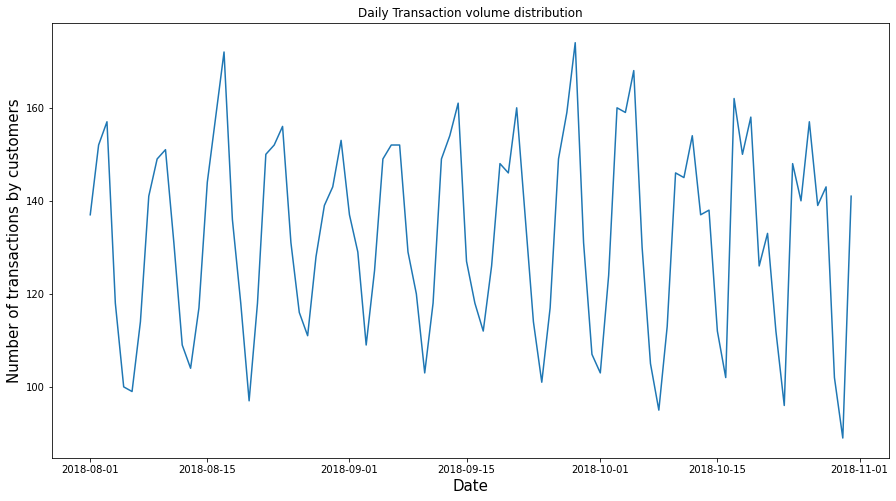

In [66]:
plt.figure(figsize=(15,8))
sns.lineplot(x=data_date_count.index, y=data_date_count['customer_id'])
plt.title("Daily Transaction volume distribution")
plt.xlabel("Date", fontsize=15)
plt.ylabel("Number of transactions by customers", fontsize=15)
plt.show()

Daily Transaction Amount distribution

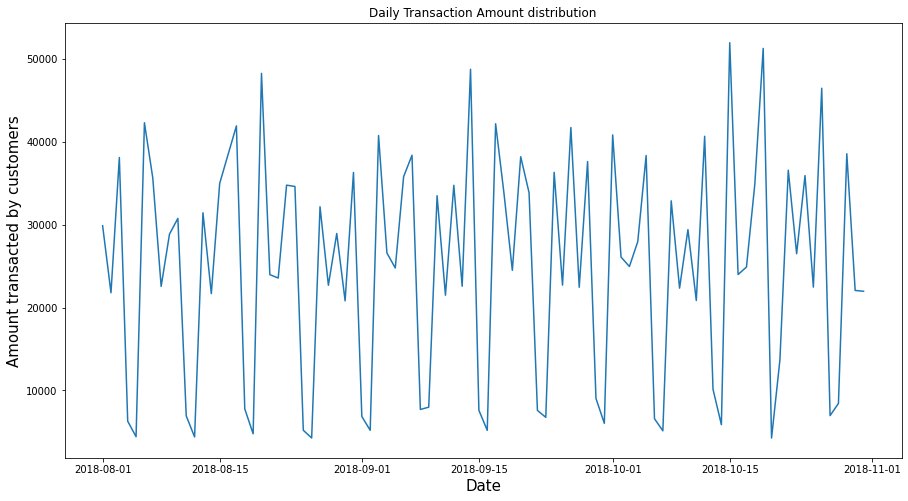

In [67]:
plt.figure(figsize=(15,8))
sns.lineplot(x=data_date_sum.index, y=data_date_sum['amount'])
plt.title("Daily Transaction Amount distribution")
plt.xlabel("Date", fontsize=15)
plt.ylabel("Amount transacted by customers", fontsize=15)
plt.show()

From the above two line plots, we can infer that the number of transactions as well as the amount transacted are remarkably low on weekends especially on sunday.

In [55]:
monthly = df.groupby('month').size().to_frame('count')

monthly = monthly.sort_values('count', ascending = False).reset_index()

monthly

,month,count
0,10,4087
1,9,4013
2,8,3943


In [56]:
avg_tran_per_month = monthly['count'].sum() // len(monthly['count'])

avg_tran_per_month

4014


Number of Transactions per month : 4014

In [57]:
monthly_amount = df.groupby('month')[['amount']].sum()

monthly_amount = monthly_amount.sort_values('amount', ascending = False).reset_index()

monthly_amount

,month,amount
0,10,802798.47
1,9,730550.21
2,8,729935.52


In [58]:
# avg transactions customers do each month
month_avg = monthly_amount['amount'].sum() / len(monthly_amount['amount'])

month_avg = month_avg.round(decimals = 2)

month_avg

754428.07

Amount of transaction per month : 754422.65 AUD